In [1]:
from hyper import *
from alignment import *
from datasets.preprecossing import *
from core import *
from datasets.loading import *
from datasets.hc_dataset import *
from datasets.balance_dataset import *
from utils.linkage import *
from model.balancehc import balancehc

from utils.poincare import *
import scib
import shutil



In [2]:
cell_path1 = './datas/111/CHOL_GSE142784.h5ad'
folder_path1 = './datas/impute/'
radius1 = 0
c1 =0
epoches1 =  50
epoches2 =  10
contin = False
resolution=2
method='average'
alignment=1
n_pca=50
meta_col = 'Celltype..major.lineage.'
mst = False


In [3]:
adata1 = sc.read_h5ad('./datas/miss/1/'+"save.h5ad")
adata1

AnnData object with n_obs × n_vars = 2452 × 636
    obs: 'celltype', 'celltype1', 'leiden'
    var: 'n_cells'

In [4]:
datas =sc.read_h5ad('./datas/111/BRCA_GSE110686.h5ad')
datas

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/orig.ident' was written without encoding metadata.
  return read_elem(dataset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nCount_RNA' was written without encoding metadata.
  return read_elem(dataset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nFeature_RNA' was written without encoding metadata.
  return read_elem(dataset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/UMAP_1' was written without encoding metadata.
  return read_elem(dataset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/UMAP_2' was written without encoding metadata.
  return 

AnnData object with n_obs × n_vars = 6035 × 12750
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage'
    var: 'features'

In [5]:
adata = datas[adata1.obs.index.tolist(),[ i for i in adata1.var.index if i in datas.var.index]]

In [6]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, exclude_highly_expressed=True)
sc.pp.log1p(adata)
adata

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
/Users/dongjiajie/opt/anaconda3/lib/python3.8/contextlib.py:120: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


AnnData object with n_obs × n_vars = 1803 × 627
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes'
    var: 'features', 'n_cells'
    uns: 'log1p'

In [7]:
sc.pp.highly_variable_genes(
    adata,
    min_mean=0.0125,
    max_mean=3,
    min_disp=0.5,
    n_top_genes=2000
)
adata.raw = adata
adata._inplace_subset_var(adata.var['highly_variable'])
adata.to_df()

,GZMK,TMSB4X,CCL5,RPS27,MALAT1,RPL10,RPL41,GZMA,RPS14,RPS18,...,COPZ1,ARPC4,NOP10,UBE2D2,NDUFA1,EDF1,ATP5C1,C12orf57,ISCU,COX8A
CTCCTAGTCTGGCGTG-2,0.000000,1.921308,0.000000,1.666132,1.962387,1.591665,1.625788,0.000000,1.535567,1.591665,...,0.000000,0.842998,0.000000,0.000000,1.161456,1.161456,1.161456,0.000000,1.049278,1.049278
GACCTGGAGTAATCCC-3,0.000000,1.840963,1.722969,1.537971,2.073319,1.566072,1.611526,1.412280,1.537971,1.504655,...,0.000000,0.000000,0.000000,1.039355,0.000000,1.039355,0.000000,0.000000,1.039355,1.237123
ATCTGCCAGTGTCCAT-3,0.000000,1.926578,0.000000,1.885430,2.077634,1.819139,1.848099,0.000000,1.713696,1.728801,...,0.000000,0.000000,0.897057,0.000000,0.000000,0.897057,0.897057,0.000000,1.114027,0.000000
GTCCTCAAGTGCCATT-2,0.000000,1.886820,0.000000,1.505638,2.003457,1.402717,1.546978,0.000000,1.337273,1.428529,...,1.053973,0.849874,0.849874,0.849874,1.053973,1.053973,0.000000,0.000000,1.053973,1.164785
CTGCCTATCGACGGAA-2,1.500692,1.840829,0.000000,1.712664,2.012981,1.759788,1.752875,1.187163,1.693138,1.824428,...,0.000000,0.982330,0.000000,0.982330,0.982330,0.982330,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCAGTTGTTGCCTCT-1,0.000000,1.839163,0.000000,1.425017,1.967950,1.570438,1.555748,0.000000,1.347443,1.596426,...,0.000000,1.110478,0.907109,0.000000,1.110478,0.907109,0.000000,0.000000,0.000000,0.907109
TCGTACCTCCGGGTGT-2,1.063754,1.878248,1.269226,1.760878,2.216599,1.771520,1.760878,1.504371,1.634852,1.815990,...,0.000000,0.000000,1.063754,0.000000,0.000000,1.063754,0.000000,0.000000,0.000000,0.000000
CGATCGGTCATCTGTT-1,0.000000,1.984022,1.490012,1.389917,2.123082,1.644066,1.644066,1.389917,1.605485,1.644066,...,1.389917,1.199988,1.199988,1.199988,1.389917,0.000000,1.199988,1.389917,1.199988,0.000000
AACTCTTAGCCACCTG-3,0.000000,1.838000,0.000000,1.710487,2.038023,1.679675,1.686362,1.339627,1.514875,1.649562,...,0.000000,0.000000,0.897775,0.000000,0.000000,0.897775,0.000000,0.897775,0.897775,0.897775


In [402]:
adata.obs['Celltype..minor.lineage.'].value_counts()

Tfh      799
Th17     394
CD4Tn    371
Th2      239
Name: Celltype..minor.lineage., dtype: int64

In [419]:
t=adata.obs['Celltype..minor.lineage.'].groupby(adata.obs['Celltype..minor.lineage.']).apply(lambda x: x.sample(239)).index
ins = []
for i,j in t:
    ins.append(j)
ins

['GTTACAGAGACAAGCC-3',
 'CTCACACGTTCAACCA-2',
 'CCATTCGTCTAACCGA-1',
 'TTTGTCAGTGTGGTTT-1',
 'GTTAAGCGTCCGAACC-2',
 'ACTGAGTGTCGGCATC-2',
 'ACTATCTGTCTAGCGC-1',
 'GCCTCTAGTCAACATC-1',
 'CCTTCCCTCGAGAACG-1',
 'CTGCCTATCGACGGAA-2',
 'CAGCATATCGATGAGG-2',
 'ATTGGTGGTTATGCGT-1',
 'TACTTGTCAGGGTATG-2',
 'GAAATGATCACTCCTG-3',
 'TGCGCAGCACCTCGTT-2',
 'GATGCTAAGAGGTACC-1',
 'AGCTCTCCACAGGTTT-3',
 'GGTGTTATCAGCCTAA-2',
 'TGACTTTAGCAGCGTA-2',
 'ACGGCCATCAGCTCGG-3',
 'CAGCATATCACTCTTA-2',
 'AGAGCGATCCAATGGT-2',
 'CGCTATCTCCTACAGA-1',
 'TCTATTGTCTATCCTA-3',
 'GTGCATATCACCTCGT-3',
 'CGTGAGCGTATTACCG-2',
 'TTGAACGCACTATCTT-1',
 'ACTGCTCTCTTCAACT-3',
 'TTGACTTTCTTCTGGC-1',
 'GACCTGGGTAGTGAAT-2',
 'GAATAAGGTGGTAACG-1',
 'ACTGAACGTTCCATGA-2',
 'CTGATCCGTCTCAACA-1',
 'GTCACGGTCACCAGGC-1',
 'TTCTTAGTCTACTTAC-2',
 'TGTGTTTTCAAACAAG-2',
 'TAGTGGTTCCAGATCA-1',
 'GGTATTGGTGCTGTAT-1',
 'CACAAACTCTGTGCAA-1',
 'ACGGGCTTCTGGCGTG-1',
 'GTTACAGGTCGCATAT-1',
 'ACTTTCATCTGCAAGT-1',
 'TTCGAAGTCCATTCTA-1',
 'CTCGTACGT

In [435]:
tm = adata[ins]

In [700]:
resolution = 5
n_pca = 10
preprocessing_cluster(tm,N_pcs=n_pca,resolution=resolution)

inter_gene = sort_data(tm,tm)

tmp1 = calculate_cluster_centroid_for_genes(tm,inter_gene,folder_path1)
meta_list = calculate_cluster_celltype(tm,meta_col='Celltype..minor.lineage.');
tmp1.shape

(36, 10)

In [613]:
def rotate(nodes,embeddings,epoches2,n,similarities):
    deep_search_tree(root,0,[],root)
    result1 = []
    result2 = []

    distances = []
    for i in nodes:
        if(int(i)>=n):
            if(int(i.son[0]) <n and int(i.son[1])<n ):
                for i1,j1 in itertools.combinations(i.subson,2):
                    for j in i.rest(n):
                        result1.append([[i1,j1],j,int(i),1,int(j)])
                    
    for i in nodes[:-1]:
        if(int(i)>=n and len(i.son)>=2):
            for i1 in range(len(i.subson)):
                for i2 in range(i1+1,len(i.subson)):
                    for j in i.rest(n):
                        result2.append([[i.subson[i1],i.subson[i2]],j,int(i),0,int(i.f)])
            
    for i in nodes:
        distances.append(i.distance_to_root);
    distances = torch.tensor(distances)
    print(len(result1),len(result2))
    dataset_test1 = balance_dataset(similarities,len(result1),embeddings,distances,result1)
    dataloader1 = data.DataLoader(dataset_test1, batch_size=1, shuffle=True, pin_memory=True)
    
    dataset_test2 = balance_dataset(similarities,min(1000,len(result2)),embeddings,distances,result2)
    dataloader2 = data.DataLoader(dataset_test2, batch_size=1, shuffle=True, pin_memory=True)    
    
    model2 = balancehc(nodes1,torch.tensor(embeddings),hyperparamter = 1)
    
    Optimizer = getattr(optim, 'RAdam')
    optimizer = Optimizer(model2.parameters(),0.0005)
    train3(model2,dataloader1,dataloader2,optimizer,epoches2)
    temp = model2.embeddings.weight.data
    return temp

In [615]:
def merge_points(similarities,root,nodes,embeddings,epoches,c1,c2,n):
    root,_ = search_tree(root,c1,c2,n)
    if(_ == True):
        return embeddings,root
    nodes_merge = [];
    add_meta(root,[],nodes_merge)
    print(nodes_merge)
    for i in nodes_merge:
        if(int(i)<n):
            i.subson = [int(i)]
        else:
            i.subson=[]
    deep_search_tree(root,0,[],root)
    result1 = []
    result2 = []

    distances = []
    for i in nodes_merge:
        if(int(i)>=n):
            if(int(i.son[0]) <n and int(i.son[1])<n ):
                for i1,j1 in itertools.combinations(i.subson,2):
                    for j in i.rest(n):
                        result1.append([[i1,j1],j,int(i),1,int(j)])
                    
    for i in nodes_merge[1:]:
        if(int(i)>=n and len(i.son)>=2):
            for i1 in range(len(i.subson)):
                for i2 in range(i1+1,len(i.subson)):
                    for j in i.rest(n):
                        result2.append([[i.subson[i1],i.subson[i2]],j,int(i),0,int(i.f)])
            
    for i in nodes:
        distances.append(i.distance_to_root);
    distances = torch.tensor(distances)
    print(len(result1),len(result2))
    model2 = balancehc(nodes,torch.tensor(embeddings),hyperparamter = 1)
    if(len(result1) !=0 and len(result2)!=0):
        
        dataset_test1 = balance_dataset(similarities,len(result1),embeddings,distances,result1)
        dataloader1 = data.DataLoader(dataset_test1, batch_size=1, shuffle=True, pin_memory=True)
        
        dataset_test2 = balance_dataset(similarities,min(1000,len(result2)),embeddings,distances,result2)
        dataloader2 = data.DataLoader(dataset_test2, batch_size=1, shuffle=True, pin_memory=True)    
        
        
        Optimizer = getattr(optim, 'RAdam')
        optimizer = Optimizer(model2.parameters(),0.0005)
        train3(model2,dataloader1,dataloader2,optimizer,epoches)
    temp = model2.embeddings.weight.data
    return temp,nodes_merge[0]

In [1119]:
l1=[]
for i in range(len(meta_list)):
    if(meta_list[i]=='CD4Tn' or meta_list[i]=='Th17' or meta_list[i]=='Th2' or meta_list[i]=='Tfh' ):
        l1.append(str(i))
l1
nocd4 = tm[tm.obs[tm.obs['leiden'].isin(l1)].index]

nocd4

View of AnnData object with n_obs × n_vars = 956 × 627
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes', 'leiden'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'diffmap_evals', 'umap', 'leiden', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_diffmap', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [1154]:
l2=[]
for i in range(len(meta_list)):
    if(meta_list[i]=='CD4T1n' or meta_list[i]=='Th117' or meta_list[i]=='Th2'):
        l2.append(str(i))
l2
noth2 = tm[tm.obs[tm.obs['leiden'].isin(l2)].index]
noth2

View of AnnData object with n_obs × n_vars = 235 × 627
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'UMAP_1', 'UMAP_2', 'Celltype..malignancy.', 'Celltype..major.lineage.', 'Celltype..minor.lineage.', 'Cluster', 'Patient', 'Source', 'Gender', 'Stage', 'n_genes', 'leiden'
    var: 'features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'diffmap_evals', 'umap', 'leiden', 'paga', 'leiden_sizes'
    obsm: 'X_pca', 'X_diffmap', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [1155]:
l1,l2

(['0',
  '1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35'],
 ['0', '2', '4', '12', '23', '24', '27', '33', '35'])

In [1156]:
inter_gene = nocd4.var.index.tolist()

tmp1 = calculate_cluster_centroid_for_genes(nocd4,inter_gene,'./datas/impute/1/')
tmp2 = calculate_cluster_centroid_for_genes(noth2,inter_gene,'./datas/impute/2/')


meta_list1 = calculate_cluster_celltype(nocd4,meta_col='Celltype..minor.lineage.');
meta_list2 = calculate_cluster_celltype(noth2,meta_col='Celltype..minor.lineage.');

In [1157]:
meta_list1

['Th2',
 'Tfh',
 'Th2',
 'Th17',
 'Th2',
 'Th17',
 'CD4Tn',
 'Tfh',
 'Tfh',
 'CD4Tn',
 'CD4Tn',
 'Th17',
 'Th2',
 'Th17',
 'Tfh',
 'Tfh',
 'CD4Tn',
 'Tfh',
 'Th17',
 'Th17',
 'Tfh',
 'Th17',
 'CD4Tn',
 'Th2',
 'Th2',
 'CD4Tn',
 'Th17',
 'Th2',
 'Tfh',
 'CD4Tn',
 'CD4Tn',
 'CD4Tn',
 'CD4Tn',
 'Th2',
 'CD4Tn',
 'Th2']

In [1158]:
data_path = './datas/impute/1/' + 'datas.data'
np.random.seed(1234)
torch.manual_seed(1234)
x, y_true, similarities = load_data(data_path,1,tmp1.shape[1]+1,0)
print("{} length:{}".format(data_path,len(y_true)));
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)

# model.to("cpu")
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model.parameters(),0.0005)


./datas/impute/1/datas.data length:36
Generating all pairs superset


In [1159]:
train(model,dataloader,optimizer,similarities,30);


	 Epoch 0 | average train loss: 0.951537
Optimization finished.
	 Epoch 1 | average train loss: 0.934960
Optimization finished.
	 Epoch 2 | average train loss: 0.933930
Optimization finished.
	 Epoch 3 | average train loss: 0.933857
Optimization finished.
	 Epoch 4 | average train loss: 0.931397
Optimization finished.
	 Epoch 5 | average train loss: 0.930864
Optimization finished.
	 Epoch 6 | average train loss: 0.931161
Optimization finished.
	 Epoch 7 | average train loss: 0.931041
Optimization finished.
	 Epoch 8 | average train loss: 0.931168
Optimization finished.
	 Epoch 9 | average train loss: 0.930860
Optimization finished.
	 Epoch 10 | average train loss: 0.931157
Optimization finished.
	 Epoch 11 | average train loss: 0.930287
Optimization finished.
	 Epoch 12 | average train loss: 0.931265
Optimization finished.
	 Epoch 13 | average train loss: 0.931215
Optimization finished.
	 Epoch 14 | average train loss: 0.930593
Optimization finished.
	 Epoch 15 | average train loss: 0.

In [1160]:
torch.save(model.state_dict(),'./datas/impute/1/' +'model3.pth');


In [1161]:
params = torch.load(('./datas/impute/1/'+'model3.pth'), map_location=torch.device('cpu'))
model.load_state_dict(params)

<All keys matched successfully>

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/utils/mst.py:4: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/utils/mst.py:10: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addi

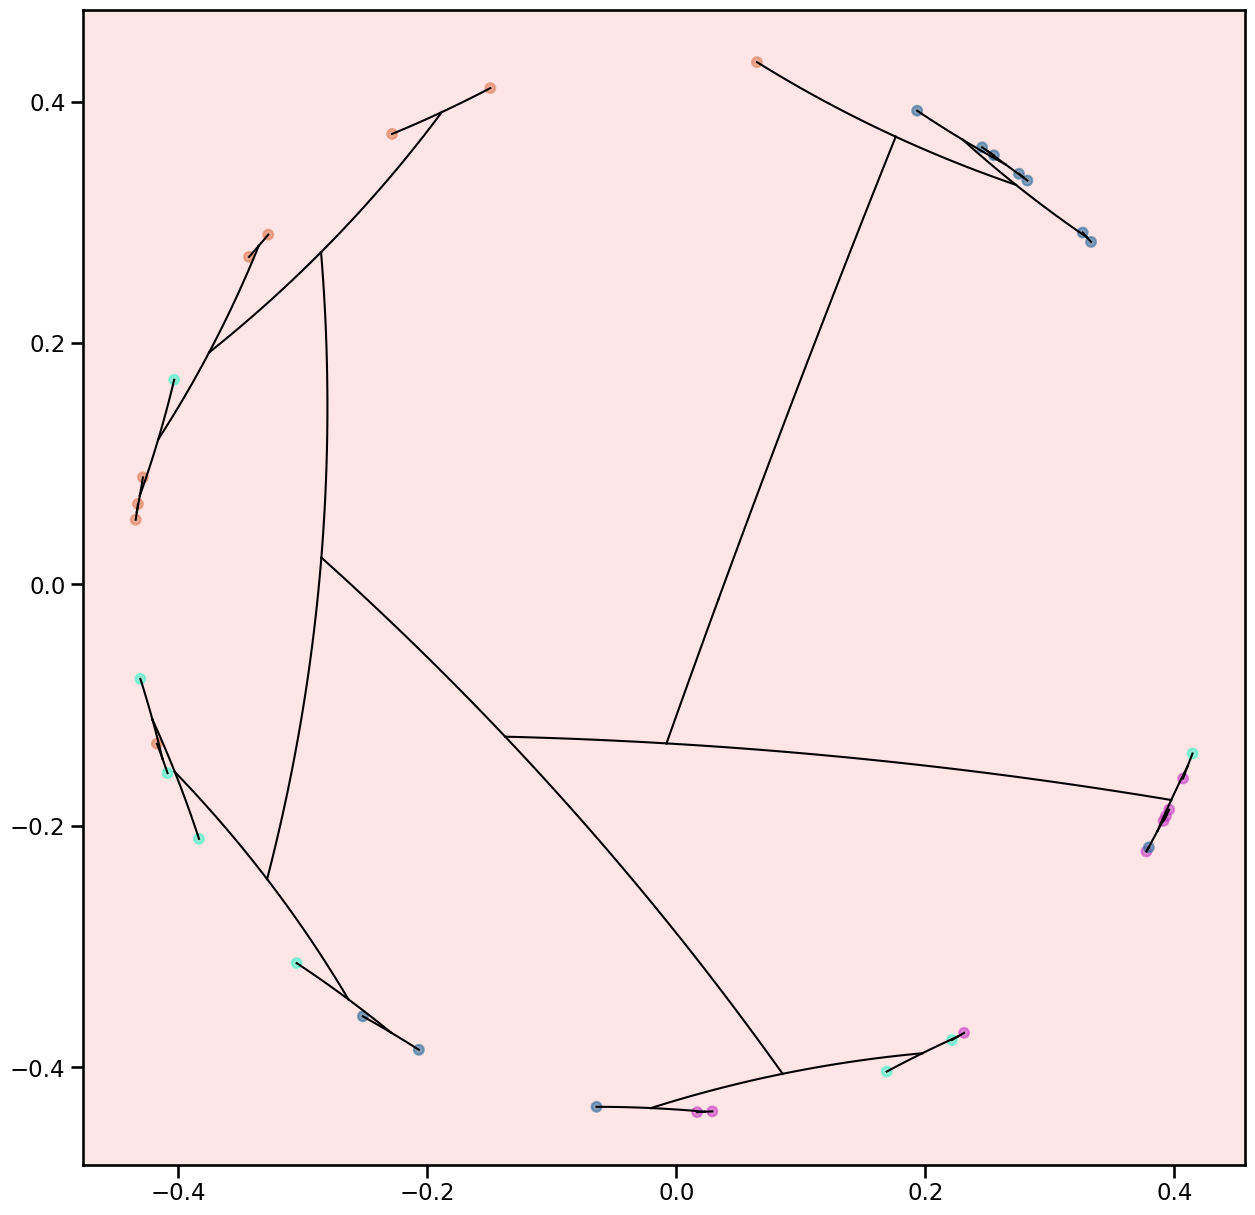

In [1162]:
model.eval()

sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n)
uf.merge(ijs)

tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)

n = len(leaves_embeddings)
embeddings = complete_tree(tree, leaves_embeddings)
colors = get_colors(meta_list1, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 1.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0], embeddings[:n, 1], c=colors, s=50, alpha=0.6)
# ax.scatter(embeddings[n:,0],embeddings[n:,1],color ='black',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2]
    plot_geodesic(x1,x2,ax)

In [1163]:

nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=torch.tensor(embeddings[i]);
    nodes1[i].hyper=torch.tensor(embeddings[i])
root = nodes1[-1];
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'empty': '#fff', 'Tfh': '#52b69a'}


In [1164]:
temp = rotate(nodes1,embeddings,3,n,similarities)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
root = nodes1[-1]

442 14906


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/datasets/balance_dataset.py:54: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:22: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



	 Epoch 0 | average train loss1: 0.496937
	 Epoch 0 | average train loss2: 0.461389


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:46: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



	 Epoch 1 | average train loss1: 0.503657


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:71: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/model/balancehc.py:92: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



	 Epoch 1 | average train loss2: 0.458815
	 Epoch 2 | average train loss1: 0.502254
	 Epoch 2 | average train loss2: 0.458133


In [1165]:
hyp_dist(nodes1[5].hyper,nodes1[1].hyper),hyp_dist(nodes1[5].hyper,nodes1[2].hyper),hyp_dist(nodes1[1].hyper,nodes1[2].hyper)

(tensor([0.5403], dtype=torch.float64),
 tensor([2.5192], dtype=torch.float64),
 tensor([2.5116], dtype=torch.float64))

In [1166]:
hyp_dist(nodes1[3].hyper,nodes1[6].hyper),hyp_dist(nodes1[4].hyper,nodes1[6].hyper),hyp_dist(nodes1[3].hyper,nodes1[4].hyper)

(tensor([2.5642], dtype=torch.float64),
 tensor([2.1227], dtype=torch.float64),
 tensor([2.3657], dtype=torch.float64))

In [1167]:
temp,root = merge_points(similarities,root,nodes1,embeddings,3,2,2,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

40 16
39 31
42 9
45 5
36 32
37 14
50 2
52 34
61 4
47 27
44 23
41 15
43 8
[70, 66, 35, 57, 16, 22, 56, 25, 49, 31, 6, 9, 29, 69, 51, 5, 1, 48, 32, 28, 38, 20, 14, 7, 68, 65, 63, 55, 11, 53, 26, 2, 18, 58, 3, 34, 10, 64, 4, 0, 62, 27, 24, 60, 13, 46, 33, 23, 12, 67, 54, 21, 15, 19, 59, 30, 8, 17]
786 14464


	 Epoch 0 | average train loss1: 0.486008
	 Epoch 0 | average train loss2: 0.465080
	 Epoch 1 | average train loss1: 0.488203
	 Epoch 1 | average train loss2: 0.463159
	 Epoch 2 | average train loss1: 0.486962
	 Epoch 2 | average train loss2: 0.462252
{'CD4Tn': '#184e77', 'Th17': '#1a759f', 'Th2': '#168aad', 'empty': '#fff', 'Tfh': '#52b69a'}


In [1168]:
names = [];
fathers = [];
xys = [];
search_merge_tree(root,-1,0,names,fathers,xys)
np.save('./datas/impute/1/'+"dataname_merge.npy",names)
np.save('./datas/impute/1/'+"datalink_merge.npy",fathers)
np.save('./datas/impute/1/'+"dataxy_merge.npy",[i.numpy() for i in xys]) 

In [1169]:
data_path = './datas/impute/2/' + 'datas.data'
np.random.seed(1234)
torch.manual_seed(1234)
x, y_true, similarities = load_data(data_path,1,tmp2.shape[1]+1,0)
print("{} length:{}".format(data_path,len(y_true)));
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)

# model.to("cpu")
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model.parameters(),0.0005)


./datas/impute/2/datas.data length:9
Generating all pairs superset


In [1170]:
train(model,dataloader,optimizer,similarities,30);


	 Epoch 0 | average train loss: 0.900142
Optimization finished.
	 Epoch 1 | average train loss: 0.890259
Optimization finished.
	 Epoch 2 | average train loss: 0.888527
Optimization finished.
	 Epoch 3 | average train loss: 0.887319
Optimization finished.
	 Epoch 4 | average train loss: 0.887150
Optimization finished.
	 Epoch 5 | average train loss: 0.887416
Optimization finished.
	 Epoch 6 | average train loss: 0.887682
Optimization finished.
	 Epoch 7 | average train loss: 0.888524
Optimization finished.
	 Epoch 8 | average train loss: 0.885011
Optimization finished.
	 Epoch 9 | average train loss: 0.885373
Optimization finished.
	 Epoch 10 | average train loss: 0.883547
Optimization finished.
	 Epoch 11 | average train loss: 0.885982
Optimization finished.
	 Epoch 12 | average train loss: 0.885388
Optimization finished.
	 Epoch 13 | average train loss: 0.885074
Optimization finished.
	 Epoch 14 | average train loss: 0.884273
Optimization finished.
	 Epoch 15 | average train loss: 0.

In [1171]:
torch.save(model.state_dict(),'./datas/impute/2/' +'model3.pth');


In [1172]:
params = torch.load(('./datas/impute/2/'+'model3.pth'), map_location=torch.device('cpu'))
model.load_state_dict(params)

<All keys matched successfully>

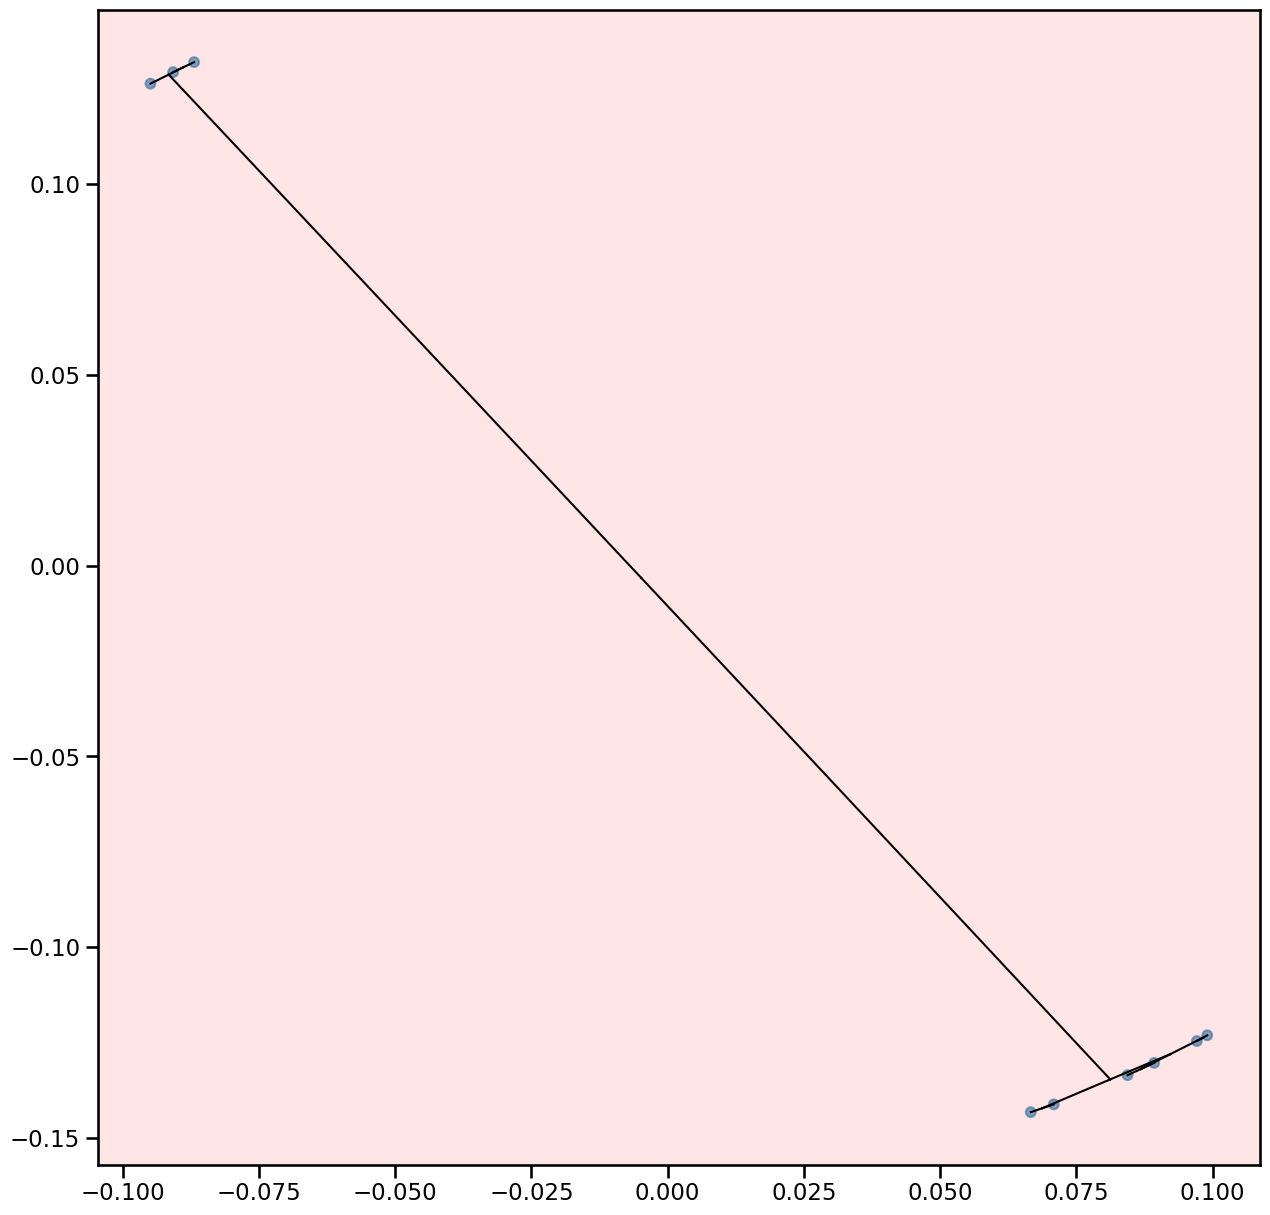

In [1173]:
model.eval()

sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n)
uf.merge(ijs)

tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)

n = len(leaves_embeddings)
embeddings = complete_tree(tree, leaves_embeddings)
colors = get_colors(meta_list2, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 1.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0], embeddings[:n, 1], c=colors, s=50, alpha=0.6)
# ax.scatter(embeddings[n:,0],embeddings[n:,1],color ='black',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2]
    plot_geodesic(x1,x2,ax)

In [1174]:

nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=torch.tensor(embeddings[i]);
    nodes1[i].hyper=torch.tensor(embeddings[i])
root = nodes1[-1];
add_meta(root,meta_list2,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

{'empty': '#fff', 'Th2': '#1a759f'}


In [1175]:
temp = rotate(nodes1,embeddings,3,n,similarities)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
root = nodes1[-1]

28 121
	 Epoch 0 | average train loss1: 0.427450


	 Epoch 0 | average train loss2: 0.398918
	 Epoch 1 | average train loss1: 0.432769
	 Epoch 1 | average train loss2: 0.394275
	 Epoch 2 | average train loss1: 0.423827
	 Epoch 2 | average train loss2: 0.394728


In [1176]:
hyp_dist(nodes1[1].hyper,nodes1[6].hyper),hyp_dist(nodes1[2].hyper,nodes1[6].hyper),hyp_dist(nodes1[2].hyper,nodes1[1].hyper)

(tensor([1.2490], dtype=torch.float64),
 tensor([0.4629], dtype=torch.float64),
 tensor([1.2546], dtype=torch.float64))

In [1177]:
hyp_dist(nodes1[0].hyper,nodes1[7].hyper),hyp_dist(nodes1[4].hyper,nodes1[7].hyper),hyp_dist(nodes1[0].hyper,nodes1[4].hyper)

(tensor([1.2486], dtype=torch.float64),
 tensor([0.3215], dtype=torch.float64),
 tensor([1.2480], dtype=torch.float64))

In [1178]:
temp,root = merge_points(similarities,root,nodes1,embeddings,3,2,2,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list2,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

10 5
11 6
9 8
13 3
[16, 12, 1, 5, 0, 15, 6, 7, 14, 8, 2, 3, 4]
48 93


	 Epoch 0 | average train loss1: 0.396438
	 Epoch 0 | average train loss2: 0.379208
	 Epoch 1 | average train loss1: 0.391861
	 Epoch 1 | average train loss2: 0.380525
	 Epoch 2 | average train loss1: 0.393710
	 Epoch 2 | average train loss2: 0.378758
{'empty': '#fff', 'Th2': '#1a759f'}


In [1179]:
names = [];
fathers = [];
xys = [];
search_merge_tree(root,-1,0,names,fathers,xys)
np.save('./datas/impute/2/'+"dataname_merge.npy",names)
np.save('./datas/impute/2/'+"datalink_merge.npy",fathers)
np.save('./datas/impute/2/'+"dataxy_merge.npy",[i.numpy() for i in xys]) 

In [1180]:
nodes1 = build_hyper_tree_from_folder('./datas/impute/1/',True)
nodes2 = build_hyper_tree_from_folder('./datas/impute/2/',True)
nodes_merge1 = [];
nodes_merge2 = [];
add_meta(nodes1[0],meta_list1,[])
add_meta(nodes2[0],meta_list2,[])

        

rate,anslist,ans = run_alignment(nodes1,nodes2,'./datas/impute/1/','./datas/impute/2/',meta_list1,meta_list2);


/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/alignment.py:797: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/Users/dongjiajie/Desktop/alignment/fyp/hyperalignment/final/alignment.py:797: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for a

The mininum cost for alignment is 53.13333333333333
The alignment edges list is [('70', '16'), ('64', '15'), ('62', '14'), ('46', '3_Th2'), ('23_Th2', '4_Th2'), ('27_Th2', '8_Th2'), ('24_Th2', '2_Th2'), ('4_Th2', '6_Th2'), ('0_Th2', '7_Th2'), ('56', '12'), ('31_CD4Tn', '5_Th2'), ('6_CD4Tn', '0_Th2'), ('25_CD4Tn', '1_Th2')]
average cost for one node:0.748356807511737

correct alignment rate:0.625


In [1181]:
0.8571428571428571

0.8571428571428571

In [1182]:
ans

[('70', '16'),
 ('64', '15'),
 ('62', '14'),
 ('46', '3_Th2'),
 ('23_Th2', '4_Th2'),
 ('27_Th2', '8_Th2'),
 ('24_Th2', '2_Th2'),
 ('4_Th2', '6_Th2'),
 ('0_Th2', '7_Th2'),
 ('56', '12'),
 ('31_CD4Tn', '5_Th2'),
 ('6_CD4Tn', '0_Th2'),
 ('25_CD4Tn', '1_Th2')]

In [1183]:
meta_list1

['Th2',
 'Tfh',
 'Th2',
 'Th17',
 'Th2',
 'Th17',
 'CD4Tn',
 'Tfh',
 'Tfh',
 'CD4Tn',
 'CD4Tn',
 'Th17',
 'Th2',
 'Th17',
 'Tfh',
 'Tfh',
 'CD4Tn',
 'Tfh',
 'Th17',
 'Th17',
 'Tfh',
 'Th17',
 'CD4Tn',
 'Th2',
 'Th2',
 'CD4Tn',
 'Th17',
 'Th2',
 'Tfh',
 'CD4Tn',
 'CD4Tn',
 'CD4Tn',
 'CD4Tn',
 'Th2',
 'CD4Tn',
 'Th2']

In [1184]:
meta_list2

['Th2', 'Th2', 'Th2', 'Th2', 'Th2', 'Th2', 'Th2', 'Th2', 'Th2']

In [1185]:
len(nodes1),len(nodes2)

(58, 13)